# Bitcoin Price Analysis

Historic price of bitcoins are provided for analysis

--Ingest the data into a format that is easy for analysis.
--Perform Exploratory Data Analysis on the dataset
--Can you predict the future price of the dataset

PRICES ARE IN USD $ ONLY

In [133]:
#importing required Library
import numpy as np                                                                      
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR

#---------------

In [134]:
#help in plotting easily

%matplotlib inline

In [135]:
import pandas as pd
import requests
import io
from io import StringIO


# Reading File And Exploratory Data Analysis On Dataset


In [142]:
#use pandas to read  scv file

url1='https://raw.githubusercontent.com/colaberry/hackathons/master/data/Bitcoin/bitcoin_dataset.csv'
data=pd.read_csv(url1)
url2='https://raw.githubusercontent.com/colaberry/hackathons/master/data/Bitcoin/test_set.csv'
test=pd.read_csv(url2)


In [143]:
#checking the whole data sample
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [144]:
test.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


In [145]:
#colums available in dataset

data.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [146]:
test.columns

Index(['Date', 'btc_total_bitcoins', 'btc_market_cap', 'btc_trade_volume',
       'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks',
       'btc_n_transactions_per_block', 'btc_median_confirmation_time',
       'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction_percent',
       'btc_cost_per_transaction', 'btc_n_unique_addresses',
       'btc_n_transactions', 'btc_n_transactions_total',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [147]:
#dividing  dataset 
# x as data and y as target in 2 different sets
#date is kept different for parsing in graph

#data as x 
x=pd.DataFrame(data[['btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd']])

#targdet as y
y=pd.DataFrame(data['btc_market_price'])

#and date kept different for ease in fitting and splitting for furter proess
date=pd.DataFrame(data['Date'])

In [151]:
x_test=pd.DataFrame(test[['btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd']])

#targdet as y
#y_test=pd.DataFrame(test['btc_market_price'])

#and date kept different for ease in fitting and splitting for furter proess
date_test=pd.DataFrame(test['Date'])

In [152]:
#checking the x data 
x.head()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [153]:
#checking the y target data set for latest pricess as initial prices are zero
y.tail()

,btc_market_price
2901,11524.77667
2902,11765.71000
2903,11212.65500
2904,10184.06167
2905,10125.01333


In [154]:
#checking for null value in x set which is dataset

x.isnull().any()

btc_total_bitcoins                                      True
btc_market_cap                                         False
btc_trade_volume                                        True
btc_blocks_size                                         True
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                            True
btc_hash_rate                                          False
btc_difficulty                                          True
btc_miners_revenue                                     False
btc_transaction_fees                                    True
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses                                 False
btc_n_transactions                                     False
btc_n_transactions_total

In [155]:
#check show we have null values in several blocks
#we need to clean the data
#we can fix ths problem by filling null value by mean value and thus cleaning the data

x=x.fillna(x.mean())

In [156]:
x_test=x_test.fillna(x_test.mean())

In [157]:
# again checking for null value in x set which is dataset

x.isnull().any()

btc_total_bitcoins                                     False
btc_market_cap                                         False
btc_trade_volume                                       False
btc_blocks_size                                        False
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                           False
btc_hash_rate                                          False
btc_difficulty                                         False
btc_miners_revenue                                     False
btc_transaction_fees                                   False
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses                                 False
btc_n_transactions                                     False
btc_n_transactions_total

In [158]:
y_test.isnull().any()

btc_market_price    False
dtype: bool

In [159]:
#thus our x data is clean now and ready

In [160]:
x_test.isnull().any()

btc_total_bitcoins                                     False
btc_market_cap                                         False
btc_trade_volume                                       False
btc_blocks_size                                        False
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                           False
btc_hash_rate                                          False
btc_difficulty                                         False
btc_miners_revenue                                     False
btc_transaction_fees                                   False
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses                                 False
btc_n_transactions                                     False
btc_n_transactions_total

In [161]:
#cheacking the y or target set for null values 
y.isnull().any()

btc_market_price    False
dtype: bool

In [162]:
#our y set is cleanand ready

In [163]:
#checking date set
date.isnull().any()

Date    False
dtype: bool

In [164]:
#date set is also clean

In [165]:
#checkin the mean values
x.mean()

btc_total_bitcoins                                     1.151138e+07
btc_market_cap                                         1.344352e+10
btc_trade_volume                                       7.398381e+07
btc_blocks_size                                        3.550550e+04
btc_avg_block_size                                     3.503659e-01
btc_n_orphaned_blocks                                  3.640743e-01
btc_n_transactions_per_block                           6.716737e+02
btc_median_confirmation_time                           7.501113e+00
btc_hash_rate                                          1.244070e+06
btc_difficulty                                         1.606360e+11
btc_miners_revenue                                     2.184353e+06
btc_transaction_fees                                   6.043450e+01
btc_cost_per_transaction_percent                       6.674782e+01
btc_cost_per_transaction                               1.463913e+01
btc_n_unique_addresses                          

In [166]:
#checking y mean
y.mean()

btc_market_price    839.104218
dtype: float64

In [167]:
#average price is thus  839.104218 USD for bitcoin for its lifetime

In [168]:
#more description of x data
x.describe()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2.906000e+03,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2.906000e+03,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,1.606360e+11,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,4.180461e+06,3.866841e+10,2.913639e+08,43400.369940,0.353168,0.842259,689.561322,4.964264,2.924141e+06,3.714886e+11,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,2.527738e+00,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,8.536962e+06,5.363081e+07,2.968431e+05,801.500000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,1.591075e+06,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,1.237281e+07,3.346869e+09,1.024046e+07,15782.500000,0.196022,0.000000,375.000000,7.900000,2.176189e+04,2.621404e+09,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,1.517080e+07,8.075525e+09,2.932135e+07,57426.500000,0.676065,0.000000,1232.995223,10.150000,1.035363e+06,1.200000e+11,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,2.600000e+12,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [169]:
#more description of y target data
y.describe()

,btc_market_price
count,2906.000000
mean,839.104218
std,2304.972497
min,0.000000
25%,6.653465
50%,235.130000
75%,594.191164
max,19498.683330


# #VISUALISING AND ANALYSIS FROM GRAPH AND DIFFERNET PLOTS

with matplotlib and seaborn differnt visuals

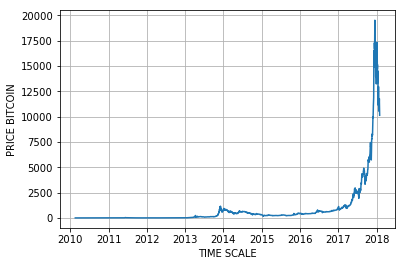

In [170]:
plt.grid()
plt.plot_date(date['Date'],y['btc_market_price'],fmt='-')
plt.xlabel("TIME SCALE")
plt.ylabel("PRICE BITCOIN")

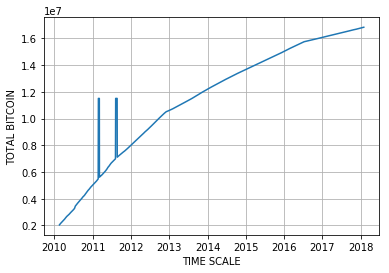

In [171]:
plt.grid()
plt.plot_date(date['Date'],x['btc_total_bitcoins'],fmt='-')
plt.xlabel("TIME SCALE")
plt.ylabel("TOTAL BITCOIN")

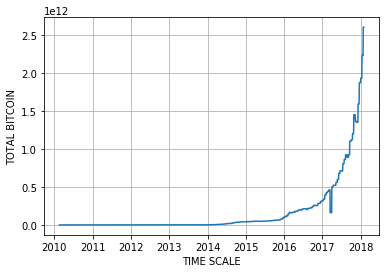

In [172]:
plt.grid()
plt.plot_date(date['Date'],x['btc_difficulty'],fmt='-')
plt.xlabel("TIME SCALE")
plt.ylabel("TOTAL BITCOIN")

In [173]:
#the difficulty is proportional to price as price increase the difficulty also increse

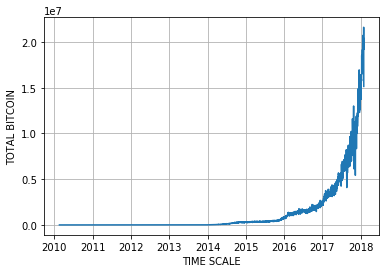

In [174]:
plt.grid()
plt.plot_date(date['Date'],x['btc_hash_rate'],fmt='-')
plt.xlabel("TIME SCALE")
plt.ylabel("TOTAL BITCOIN")

In [175]:
#hash rate and price and difficulty look same in plot and must have some relation

In [176]:
#looking for some typr of realtion or so called corelation

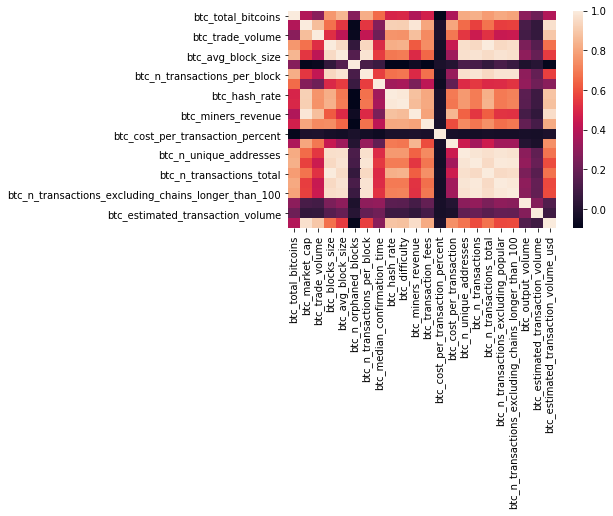

In [177]:
#watching with heat map for differnt relation
sns.heatmap(x.corr())

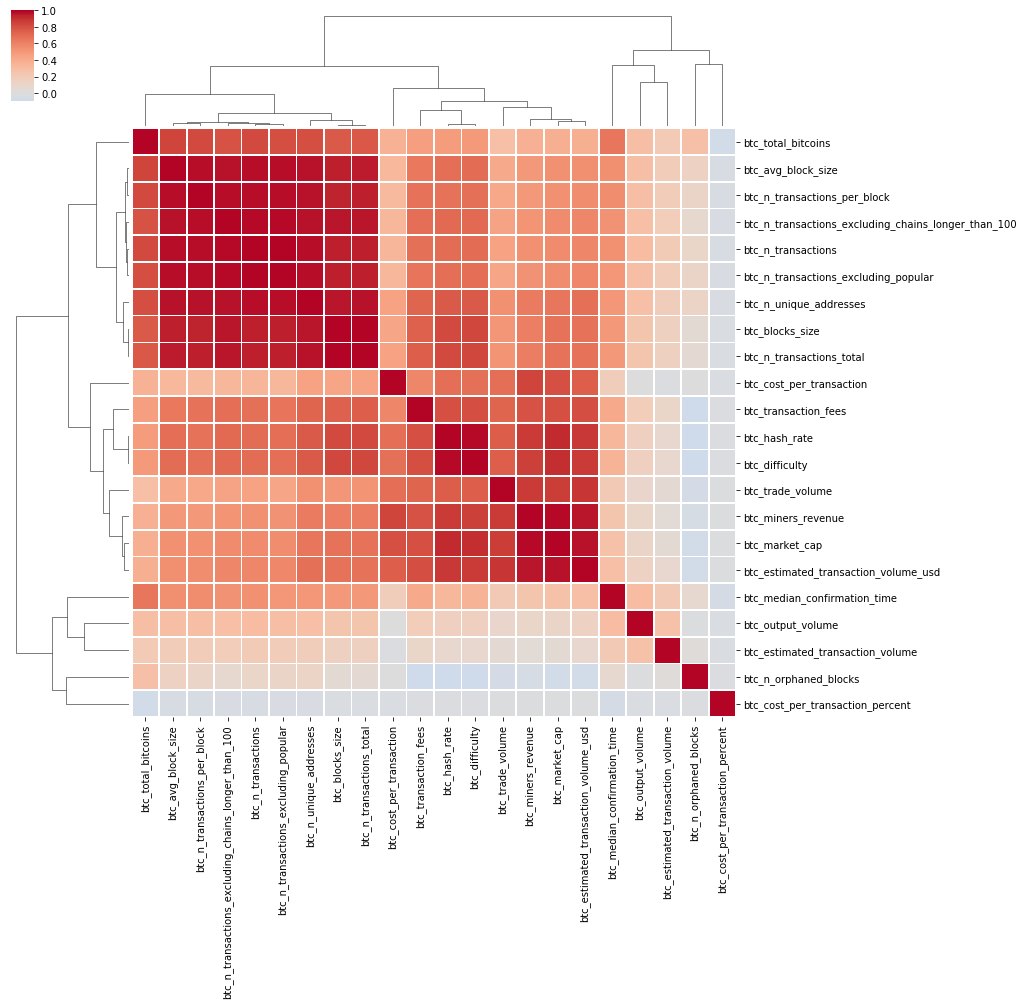

In [178]:
#better view with cluster map
sns.clustermap(x.corr(), center=0,cmap='coolwarm' ,linewidths=.75, figsize=(13, 13))

In [179]:
#differnt conclusion can be made with this cluster plot for relation bewteen different labels for x data set
#dificuly and hash rate are related as above said
#and price also 
#mostly dependency can be seen by these 
#and others are also realated and can effect price by miner effect


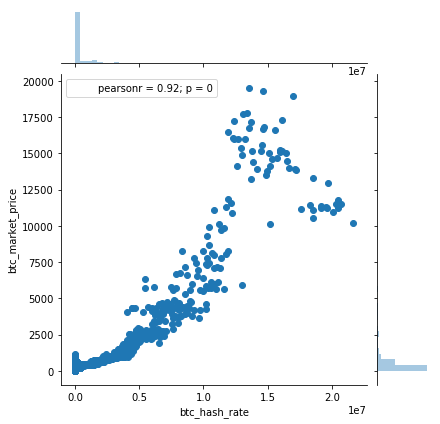

In [180]:
sns.jointplot(x['btc_hash_rate'], y['btc_market_price'])

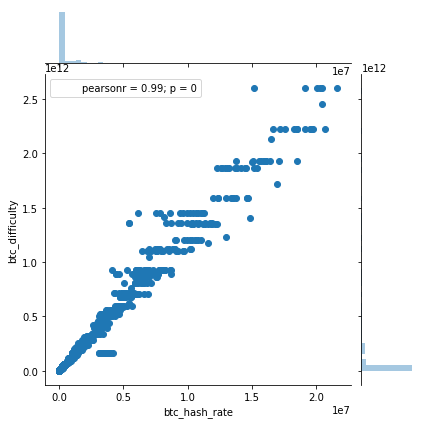

In [181]:
sns.jointplot(x['btc_hash_rate'], x['btc_difficulty'])

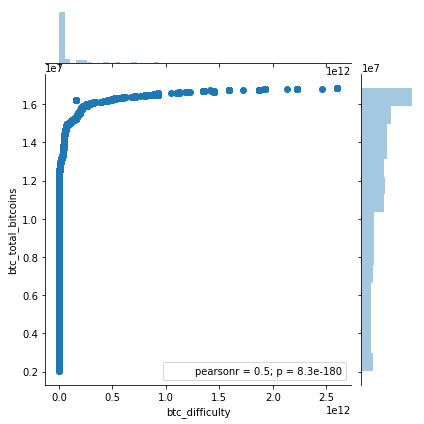

In [182]:
sns.jointplot(x['btc_difficulty'], x['btc_total_bitcoins'])

In [183]:
#thus it lloks as the as difficulty increase the number of coin become constant

# data fitting processing and prediction 
using sklearn and regression models

In [184]:
#ls be the linear model

ls=LinearRegression()

In [190]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [192]:
#fitting the data 
#learniing
#training the model over data
ls.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [193]:
ls.score(X_test,y_test)

0.99992605664515399

# FINAL ANALYSIS FOR PRDICTION


In [194]:
prediction=ls.predict(x_test)

In [199]:
prediction

array([[ 9055.60839704],
       [ 8899.26520669],
       [ 9085.87407082],
       [ 8430.32406693],
       [ 6767.38603044],
       [ 7596.14335545],
       [ 8057.60842947],
       [ 8259.13824677],
       [ 8555.37539682],
       [ 8298.70337302],
       [ 8377.15699236],
       [ 8801.15783021],
       [ 8582.58843328],
       [ 9309.214738  ]])

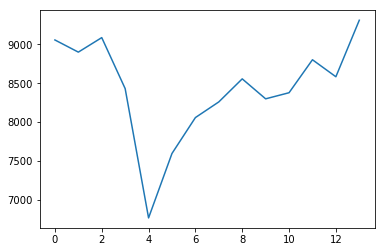

In [203]:
plt.plot(prediction,'-')